In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Function to load an image and its bounding boxes
def load_image_with_boxes(image_path, label_path, image_size=(640, 640)):
    """
    Load an image and its corresponding bounding boxes.
    Args:
        image_path (str): Path to the image file.
        label_path (str): Path to the label file (YOLO format).
        image_size (tuple): Desired size to resize the image (width, height).
    Returns:
        image (numpy.ndarray): The loaded image.
        boxes (list): List of bounding boxes in format [x_min, y_min, x_max, y_max].
    """
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization
    original_height, original_width = image.shape[:2]

    # Resize the image
    image = cv2.resize(image, image_size)
    resized_width, resized_height = image_size

    # Load bounding boxes from the label file
    boxes = []
    with open(label_path, 'r') as f:
        for line in f.readlines():
            # YOLO format: [class_id, x_center, y_center, width, height] (normalized)
            class_id, x_center, y_center, width, height = map(float, line.split())

            # Convert YOLO format to absolute coordinates
            x_center *= original_width
            y_center *= original_height
            width *= original_width
            height *= original_height

            # Convert to [x_min, y_min, x_max, y_max]
            x_min = int(x_center - width / 2)
            y_min = int(y_center - height / 2)
            x_max = int(x_center + width / 2)
            y_max = int(y_center + height / 2)

            # Scale bounding boxes to the resized image
            x_min = int(x_min * (resized_width / original_width))
            y_min = int(y_min * (resized_height / original_height))
            x_max = int(x_max * (resized_width / original_width))
            y_max = int(y_max * (resized_height / original_height))

            boxes.append([x_min, y_min, x_max, y_max])

    return image, boxes

In [3]:
# Function to draw bounding boxes on an image
def draw_boxes(image, boxes, color=(0, 255, 0), thickness=2):
    """
    Draw bounding boxes on an image.
    Args:
        image (numpy.ndarray): The image to draw on.
        boxes (list): List of bounding boxes in format [x_min, y_min, x_max, y_max].
        color (tuple): Color of the bounding boxes (RGB).
        thickness (int): Thickness of the bounding box lines.
    Returns:
        image (numpy.ndarray): The image with bounding boxes drawn.
    """
    for box in boxes:
        x_min, y_min, x_max, y_max = box
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)
    return image

#### Plotting bounding boxes onto a sample image.

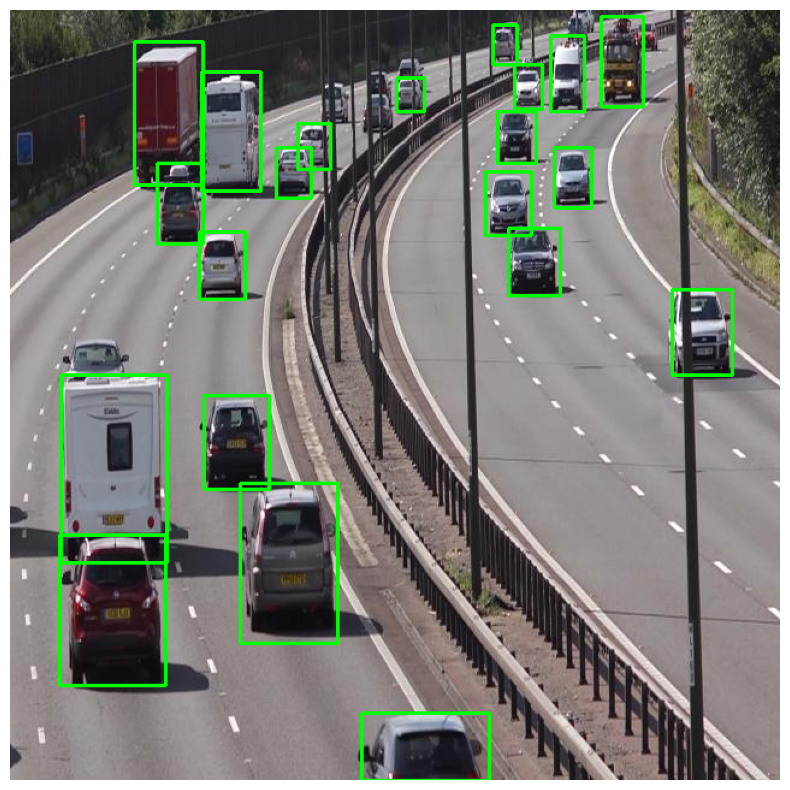

In [4]:
# Example usage
if __name__ == "__main__":
    # Paths to the image and label files
    image_path = "/kaggle/input/vehicle-detection/Vehicle_Detection_Image_Dataset/train/images/10_mp4-10_jpg.rf.b87509668caff369c5501325477e6d9a.jpg"  # Replace with your image path
    label_path = "/kaggle/input/vehicle-detection/Vehicle_Detection_Image_Dataset/train/labels/10_mp4-10_jpg.rf.b87509668caff369c5501325477e6d9a.txt"  # Replace with your label path

    # Load the image and bounding boxes
    image, boxes = load_image_with_boxes(image_path, label_path)

    # Draw bounding boxes on the image
    image_with_boxes = draw_boxes(image, boxes)

    # Display the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(image_with_boxes)
    plt.axis('off')
    plt.show()

In [5]:
!git clone https://github.com/ultralytics/yolov5
!cd yolov5 && pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17270, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 17270 (delta 0), reused 0 (delta 0), pack-reused 17269 (from 2)
Receiving objects: 100% (17270/17270), 16.11 MiB | 31.18 MiB/s, done.
Resolving deltas: 100% (11861/11861), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 16.4 MB/s eta 0:00:00


In [6]:
!python yolov5/train.py --img 640 --batch 16 --epochs 50 --data /kaggle/input/yaml-file/data.yaml --weights yolov5s.pt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-03-07 10:31:29.022346: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-07 10:31:29.212380: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-07 10:31:29.269869: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to regi

In [7]:
!python yolov5/detect.py --weights yolov5/runs/train/exp/weights/best.pt --source /kaggle/input/testing-image/test.jpg --conf 0.25

detect: weights=['yolov5/runs/train/exp/weights/best.pt'], source=/kaggle/input/testing-image/test.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /kaggle/input/testing-image/test.jpg: 416x640 26 Vehicles, 28.8ms
Speed: 0.5ms pre-process, 28.8ms inference, 147.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp


In [8]:
!git clone https://github.com/ultralytics/yolov5
!ls /kaggle/working/yolov5/utils
import sys
sys.path.append('/kaggle/working/yolov5')  # Add yolov5 to the Python path


fatal: destination path 'yolov5' already exists and is not an empty directory.
activations.py	  callbacks.py	  general.py	     metrics.py      triton.py
augmentations.py  dataloaders.py  google_app_engine  plots.py
autoanchor.py	  docker	  __init__.py	     __pycache__
autobatch.py	  downloads.py	  loggers	     segment
aws		  flask_rest_api  loss.py	     torch_utils.py


In [9]:
import sys
sys.path.append('/kaggle/working/yolov5')  # Add yolov5 to the Python path

import cv2
import torch
from yolov5.models.experimental import attempt_load
from yolov5.utils.general import non_max_suppression, scale_boxes
from yolov5.utils.torch_utils import select_device
from yolov5.utils.dataloaders import LoadImages  # Updated import

# Define paths
weights_path = '/kaggle/working/yolov5/runs/train/exp/weights/best.pt'  # Path to your trained weights
image_path = '/kaggle/input/testing-image/test.jpg'  # Path to your test image
output_path = '/kaggle/working/output.jpg'  # Path to save the output image

# Select device (GPU if available, else CPU)
device = select_device('')  # Automatically selects GPU if available, else CPU

# Load the trained model onto the selected device
model = attempt_load(weights_path, device=device)  # Pass device directly

# Load the image
dataset = LoadImages(image_path, img_size=640)  # Load the image

# Run inference
for path, img, im0s, _, _ in dataset:  # Unpack all 5 values
    img = torch.from_numpy(img).to(device)  # Convert image to tensor
    img = img.float() / 255.0  # Normalize pixel values
    if img.ndimension() == 3:
        img = img.unsqueeze(0)

    # Perform inference
    pred = model(img, augment=False)[0]  # Get predictions
    pred = non_max_suppression(pred, conf_thres=0.25, iou_thres=0.45)  # Apply NMS

    # Process detections
    for i, det in enumerate(pred):  # detections per image
        if len(det):
            # Rescale boxes to original image size
            det[:, :4] = scale_boxes(img.shape[2:], det[:, :4], im0s.shape).round()

            # Count cars
            car_count = 0
            for *xyxy, conf, cls in det:
                if int(cls) == 0:  # Assuming class_id for car is 0
                    car_count += 1

            print(f"Number of cars detected: {car_count}")

            # Draw bounding boxes on the image (optional)
            for *xyxy, conf, cls in det:
                if int(cls) == 0:  # Only draw boxes for cars
                    label = f'car {conf:.2f}'
                    im0s = cv2.rectangle(im0s, (int(xyxy[0]), int(xyxy[1])), (int(xyxy[2]), int(xyxy[3])), (0, 255, 0), 2)
                    im0s = cv2.putText(im0s, label, (int(xyxy[0]), int(xyxy[1]) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

            # Save the output image
            cv2.imwrite(output_path, im0s)
            print(f"Output image saved to: {output_path}")

YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs


Number of cars detected: 26
Output image saved to: /kaggle/working/output.jpg
